In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

from random import random, choice
from gym import Env
from core import Agent
import gym
from gridworld import WindyGridWorld, SimpleGridWorld
from utils import str_key, set_dict, get_dict
from utils import epsilon_greedy_pi, epsilon_greedy_policy
from utils import greedy_policy, learning_curve

## Q_learning 算法
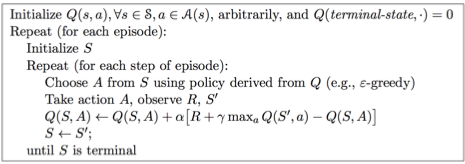

In [2]:
#Q-learning
class Q_learningAgent(Agent):
    def __init__(self, env: Env, capacity:int = 20000):
        super(Q_learningAgent, self).__init__(env, capacity)
        self.Q = {}

    # epsilon_贪婪策略
    def policy(self, A, s, Q, epsilon):
        return epsilon_greedy_policy(A, s, Q, epsilon)

    def learning_method(self, gamma=0.9, alpha=0.1, epsilon=1e-5, display=False, lambda_= None):
        self.state = self.env.reset()
        s0 = self.state
        if display:
            self.env.render()
        time_in_episode, total_reward = 0, 0
        is_done = False
        while not is_done:
            #不完全贪心决定行为
            self.policy = epsilon_greedy_policy
            a0 = self.perform_policy(s0, self.Q, epsilon)
            s1, r1, is_done, info, total_reward = self.act(a0)
            if display:
                self.env.render()
            #完全贪心预估价值
            self.policy = greedy_policy
            a1 = greedy_policy(self.A, s1, self.Q)
            old_q = get_dict(self.Q, s0, a0)
            q_prime = get_dict(self.Q, s1, a1)
            td_target = r1 + gamma * q_prime
            new_q = old_q + alpha * (td_target - old_q)
            set_dict(self.Q, new_q, s0, a0)
            s0 = s1 # 只更新状态
            time_in_episode += 1
        if display:
            print(self.experience.last_episode)
        return time_in_episode, total_reward

In [4]:
env = WindyGridWorld()
agent = Q_learningAgent(env)

data = agent.learning(gamma = 1.0, 
                            epsilon = 0.1,
                            decaying_epsilon = True,
                            alpha = 0.5, 
                            max_episode_num = 800, 
                            display = False)


100%|██████████| 800/800 [00:00<00:00, 993.79it/s] 


In [5]:
agent.learning_method(epsilon = 0.01, display = False)
data = agent.learning(gamma = 1.0, display = False, max_episode_num = 100)

100%|██████████| 100/100 [00:00<00:00, 1129.76it/s]


No handles with labels found to put in legend.


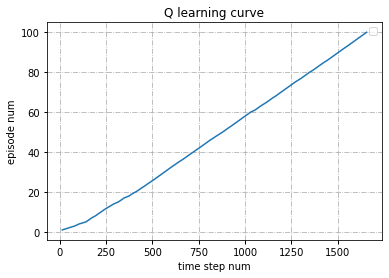

In [6]:
learning_curve(data, x_index = 0, y1_index = 2, y2_index = None,
               title="Q learning curve", x_name = "time step num", y_name = "episode num")

In [7]:
env.reset()
env.render()

True

In [ ]:
env.close()